/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:49:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


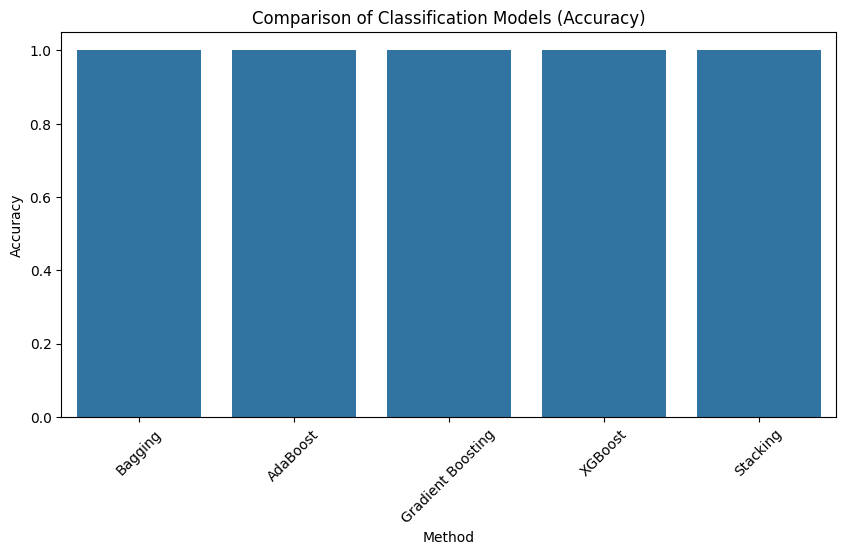

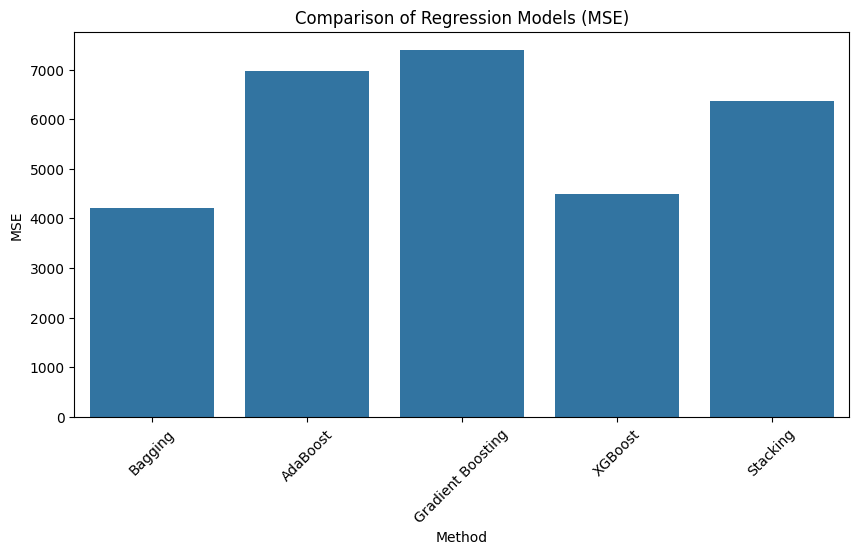

Classification Results:
               Method  Accuracy
0            Bagging       1.0
1           AdaBoost       1.0
2  Gradient Boosting       1.0
3            XGBoost       1.0
4           Stacking       1.0

Regression Results:
               Method          MSE
0            Bagging  4221.111663
1           AdaBoost  6981.038941
2  Gradient Boosting  7391.685708
3            XGBoost  4501.858676
4           Stacking  6366.113181


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    BaggingClassifier, BaggingRegressor,
    AdaBoostClassifier, AdaBoostRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor,
    StackingClassifier, StackingRegressor
)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.datasets import load_iris, make_regression

# Load the Iris dataset (Classification)
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Generate synthetic regression dataset
X_synthetic, y_synthetic = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(
    X_synthetic, y_synthetic, test_size=0.2, random_state=42
)

# ==============================================
#                CLASSIFICATION
# ==============================================

# Bagging Classifier (Updated for scikit-learn 1.2+)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20, random_state=42)
bagging_clf.fit(X_train_iris, y_train_iris)
y_pred_bagging = bagging_clf.predict(X_test_iris)
accuracy_bagging = accuracy_score(y_test_iris, y_pred_bagging)

# Boosting Classifiers
adaboost_clf = AdaBoostClassifier(n_estimators=20, random_state=42)
adaboost_clf.fit(X_train_iris, y_train_iris)
y_pred_adaboost = adaboost_clf.predict(X_test_iris)
accuracy_adaboost = accuracy_score(y_test_iris, y_pred_adaboost)

gradient_boosting_clf = GradientBoostingClassifier(n_estimators=20, random_state=42)
gradient_boosting_clf.fit(X_train_iris, y_train_iris)
y_pred_gb = gradient_boosting_clf.predict(X_test_iris)
accuracy_gb = accuracy_score(y_test_iris, y_pred_gb)

xgb_clf = XGBClassifier(n_estimators=20, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_iris, y_train_iris)
y_pred_xgb = xgb_clf.predict(X_test_iris)
accuracy_xgb = accuracy_score(y_test_iris, y_pred_xgb)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('dt', DecisionTreeClassifier()), ('svc', SVC(probability=True))],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train_iris, y_train_iris)
y_pred_stacking = stacking_clf.predict(X_test_iris)
accuracy_stacking = accuracy_score(y_test_iris, y_pred_stacking)

# Store classification results
results_clf = pd.DataFrame({
    "Method": ["Bagging", "AdaBoost", "Gradient Boosting", "XGBoost", "Stacking"],
    "Accuracy": [accuracy_bagging, accuracy_adaboost, accuracy_gb, accuracy_xgb, accuracy_stacking]
})

# ==============================================
#                REGRESSION
# ==============================================

# Bagging Regressor (Updated for scikit-learn 1.2+)
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=20, random_state=42)
bagging_reg.fit(X_train_synthetic, y_train_synthetic)
y_pred_bagging_reg = bagging_reg.predict(X_test_synthetic)
mse_bagging = mean_squared_error(y_test_synthetic, y_pred_bagging_reg)

# Boosting Regressors
adaboost_reg = AdaBoostRegressor(n_estimators=20, random_state=42)
adaboost_reg.fit(X_train_synthetic, y_train_synthetic)
y_pred_adaboost_reg = adaboost_reg.predict(X_test_synthetic)
mse_adaboost = mean_squared_error(y_test_synthetic, y_pred_adaboost_reg)

gradient_boosting_reg = GradientBoostingRegressor(n_estimators=20, random_state=42)
gradient_boosting_reg.fit(X_train_synthetic, y_train_synthetic)
y_pred_gb_reg = gradient_boosting_reg.predict(X_test_synthetic)
mse_gb = mean_squared_error(y_test_synthetic, y_pred_gb_reg)

xgb_reg = XGBRegressor(n_estimators=20, random_state=42)
xgb_reg.fit(X_train_synthetic, y_train_synthetic)
y_pred_xgb_reg = xgb_reg.predict(X_test_synthetic)
mse_xgb = mean_squared_error(y_test_synthetic, y_pred_xgb_reg)

# Stacking Regressor
stacking_reg = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor()), ('gb', GradientBoostingRegressor(n_estimators=10))]
)
stacking_reg.fit(X_train_synthetic, y_train_synthetic)
y_pred_stacking_reg = stacking_reg.predict(X_test_synthetic)
mse_stacking = mean_squared_error(y_test_synthetic, y_pred_stacking_reg)

# Store regression results
results_reg = pd.DataFrame({
    "Method": ["Bagging", "AdaBoost", "Gradient Boosting", "XGBoost", "Stacking"],
    "MSE": [mse_bagging, mse_adaboost, mse_gb, mse_xgb, mse_stacking]
})

# ==============================================
#                VISUALIZATION
# ==============================================

# Plot classification results
plt.figure(figsize=(10, 5))
sns.barplot(x="Method", y="Accuracy", data=results_clf)
plt.title("Comparison of Classification Models (Accuracy)")
plt.xticks(rotation=45)
plt.show()

# Plot regression results
plt.figure(figsize=(10, 5))
sns.barplot(x="Method", y="MSE", data=results_reg)
plt.title("Comparison of Regression Models (MSE)")
plt.xticks(rotation=45)
plt.show()

# Display results
print("Classification Results:\n", results_clf)
print("\nRegression Results:\n", results_reg)